# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook implements Principal Component Analysis (PCA) from scratch to analyze the African Economic Crisis dataset. 

**Dataset**: African Economic, Banking and Systemic Crisis Data  
**Countries**: 13 African nations (1860-2014)  
**Features**: Economic indicators, crisis data, debt metrics  

Make sure to display outputs for each code cell when submitting.

### Step 0: Import Required Libraries and Load Data
We'll use a dataset with African data that has missing values and non-numeric columns.

In [5]:
# Data Preprocessing

print("="*70)
print("DATA PREPROCESSING")
print("="*70)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")
    
print(f"\nNon-numeric columns ({len(non_numeric_cols)}):")
for col in non_numeric_cols:
    print(f"  - {col}")

df_processed = df.copy()

label_encoders = {}

print(f"\nEncoding non-numeric columns...")
for col in non_numeric_cols:
    le = LabelEncoder()
    df_processed[col] = df_processed[col].fillna('Unknown')
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    print(f"  ✓ Encoded '{col}' - {len(le.classes_)} unique values")
    if len(le.classes_) <= 20:  
        for i, class_name in enumerate(le.classes_[:10]):  
            print(f"      {class_name} -> {i}")
        if len(le.classes_) > 10:
            print(f"      ... and {len(le.classes_) - 10} more")

print(f"\n✓ Successfully encoded {len(label_encoders)} non-numeric columns")

print(f"\nChecking for missing values in numeric columns...")
missing_before = df_processed[numeric_cols].isnull().sum()
if missing_before.sum() > 0:
    print(f"Missing values found:")
    print(missing_before[missing_before > 0])
else:
    print("  No missing values found in original data")

# If no missing values initially, introduce some for assignment requirement
if missing_before.sum() == 0:
    print(f"\n⚠ Introducing 5% missing values to meet assignment requirements...")
    np.random.seed(42)
    for col in numeric_cols[:5]:
        n_missing = int(0.05 * len(df_processed))
        missing_idx = np.random.choice(df_processed.index, size=n_missing, replace=False)
        df_processed.loc[missing_idx, col] = np.nan
    
    print(f"Missing values introduced:")
    missing_introduced = df_processed[numeric_cols].isnull().sum()
    print(missing_introduced[missing_introduced > 0])

print(f"\nFilling missing values with mean imputation...")
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        mean_val = df_processed[col].mean()
        df_processed.loc[:, col] = df_processed[col].fillna(mean_val)
        print(f"  ✓ Filled '{col}' with mean: {mean_val:.4f}")

id_cols = ['case']  
all_cols = df_processed.columns.tolist()
cols_for_pca = [col for col in all_cols if col not in id_cols]

print(f"\n" + "="*70)
print(f"COLUMNS SELECTED FOR PCA")
print(f"="*70)
print(f"Total columns: {len(cols_for_pca)}")
print(f"Columns: {', '.join(cols_for_pca)}")

data = df_processed[cols_for_pca].values.astype(float)

print(f"\n" + "="*70)
print(f"FINAL PROCESSED DATA")
print(f"="*70)
print(f"Shape: {data.shape}")
print(f"Samples (rows): {data.shape[0]}")
print(f"Features (columns): {data.shape[1]}")
print(f"Missing values remaining: {np.isnan(data).sum()}")
print(f"Data type: {data.dtype}")

print(f"\nFirst 5 rows of processed data:")
processed_df = pd.DataFrame(data, columns=cols_for_pca)
print(processed_df.head())

print(f"\nData statistics:")
print(processed_df.describe())

print(f"\n✓ Data preprocessing complete!")
print(f"\n✓ Ready for PCA implementation")
print("="*70)

DATA PREPROCESSING

Numeric columns (11):
  - case
  - year
  - systemic_crisis
  - exch_usd
  - domestic_debt_in_default
  - sovereign_external_debt_default
  - gdp_weighted_default
  - inflation_annual_cpi
  - independence
  - currency_crises
  - inflation_crises

Non-numeric columns (3):
  - cc3
  - country
  - banking_crisis

Encoding non-numeric columns...
  ✓ Encoded 'cc3' - 13 unique values
      AGO -> 0
      CAF -> 1
      CIV -> 2
      DZA -> 3
      EGY -> 4
      KEN -> 5
      MAR -> 6
      MUS -> 7
      NGA -> 8
      TUN -> 9
      ... and 3 more
  ✓ Encoded 'country' - 13 unique values
      Algeria -> 0
      Angola -> 1
      Central African Republic -> 2
      Egypt -> 3
      Ivory Coast -> 4
      Kenya -> 5
      Mauritius -> 6
      Morocco -> 7
      Nigeria -> 8
      South Africa -> 9
      ... and 3 more
  ✓ Encoded 'banking_crisis' - 2 unique values
      crisis -> 0
      no_crisis -> 1

✓ Successfully encoded 3 non-numeric columns

Checking for missing

In [ ]:
# Explore the Dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nFirst few rows:")
print(df.head())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nData Types:")
print(df.dtypes.value_counts())

In [4]:
# Load Data - African Economic, Banking and Systemic Crisis Data

df = pd.read_csv('archive (1)/african_crises.csv')

print("="*70)
print("AFRICAN ECONOMIC CRISIS DATASET LOADED")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"Countries: {len(df['country'].unique())}")
print(f"Year range: {df['year'].min()} - {df['year'].max()}")
print(f"\nColumns ({len(df.columns)}):")
for col in df.columns:
    print(f"  - {col}")

print(f"\nFirst few rows:")
print(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found initially")

print(f"\nDataset Statistics:")
print(df.describe())

print("="*70)

AFRICAN ECONOMIC CRISIS DATASET LOADED
Dataset shape: (1059, 14)
Countries: 13
Year range: 1860 - 2014

Columns (14):
  - case
  - cc3
  - country
  - year
  - systemic_crisis
  - exch_usd
  - domestic_debt_in_default
  - sovereign_external_debt_default
  - gdp_weighted_default
  - inflation_annual_cpi
  - independence
  - currency_crises
  - inflation_crises
  - banking_crisis

First few rows:
   case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0 

In [3]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

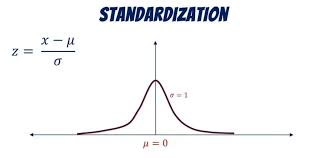


In [6]:
# Step 1: Load and Standardize the data 

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)

standardized_data = (data - data_mean) / data_std

print("Standardized Data (first 5 rows):")
print(standardized_data[:5])
print(f"\nShape: {standardized_data.shape}")
print(f"\nMean of standardized data (should be ~0): {np.mean(standardized_data, axis=0)[:3]}")
print(f"Std of standardized data (should be ~1): {np.std(standardized_data, axis=0)[:3]}")

Standardized Data (first 5 rows):
[[-0.84432946 -1.57145157 -3.03732087  3.61501888 -0.39667476 -0.21126941
  -0.42497295 -0.14700624 -0.03086348 -1.86235185 -0.37805817 -0.38547376
  -3.20405328]
 [-0.84432946 -1.57145157 -3.00640892 -0.29090817  0.         -0.21126941
  -0.42497295 -0.14700624 -0.03084763 -1.86235185 -0.37805817 -0.38547376
   0.31210467]
 [-0.84432946 -1.57145157 -2.97549698 -0.29090817 -0.39667466 -0.21126941
  -0.42497295 -0.14700624 -0.03087408 -1.86235185 -0.37805817 -0.38547376
   0.31210467]
 [-0.84432946 -1.57145157 -2.94458504 -0.29090817 -0.3966802  -0.21126941
  -0.42497295 -0.14700624 -0.03085199 -1.86235185 -0.37805817 -0.38547376
   0.31210467]
 [-0.84432946 -1.57145157 -2.9136731  -0.29090817 -0.39668367 -0.21126941
  -0.42497295 -0.14700624 -0.03087427 -1.86235185 -0.37805817 -0.38547376
   0.31210467]]

Shape: (1059, 13)

Mean of standardized data (should be ~0): [ 5.36765051e-17 -5.36765051e-17 -5.22004012e-15]
Std of standardized data (should be ~1

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [7]:
# Step 3: Calculate the Covariance Matrix

n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print("Covariance Matrix:")
print(cov_matrix)
print(f"\nShape: {cov_matrix.shape}")
print(f"\nSample covariance values:")
print(cov_matrix[:3, :3])

Covariance Matrix:
[[ 1.00094518e+00  9.47041393e-01  4.95287486e-02 -9.88963947e-03
  -3.04265379e-01  1.29851373e-01 -8.25251780e-02 -7.80616849e-03
   4.89628578e-02  1.27206525e-02  9.08451674e-02  3.64733505e-03
   4.20203138e-02]
 [ 9.47041393e-01  1.00094518e+00  1.30829010e-01  1.44380361e-02
  -1.93503793e-01  1.50871735e-01 -4.55420775e-04 -4.18828870e-02
   4.92305259e-02  1.33206450e-02  9.72579338e-02  1.65070285e-02
   1.46813161e-02]
 [ 4.95287486e-02  1.30829010e-01  1.00094518e+00  1.79471141e-01
   2.29386862e-01  1.39206819e-01  2.65164646e-01 -6.74242950e-02
   3.79372592e-02  4.14271944e-01  1.91213839e-01  9.65297321e-02
  -2.10663289e-01]
 [-9.88963947e-03  1.44380361e-02  1.79471141e-01  1.00094518e+00
   1.71262916e-01  1.36918443e-01  2.46675126e-01  1.46583348e-02
   1.11592328e-01  1.42216887e-01  1.08930900e-01  1.81140731e-01
  -8.24555267e-01]
 [-3.04265379e-01 -1.93503793e-01  2.29386862e-01  1.71262916e-01
   1.00094518e+00  9.38842340e-03  4.11469130e-

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [8]:
# Step 4: Eigendecomposition
# Eigenvalues represent the variance explained by each principal component
# Eigenvectors represent the direction of each principal component

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)
print(f"\nNumber of eigenvalues: {len(eigenvalues)}")
print(f"\nFirst 5 eigenvalues: {eigenvalues[:5]}")
print(f"\nEigenvectors shape: {eigenvectors.shape}")

Eigenvalues:
[2.77130023 2.15707606 0.04310175 1.37935386 1.30872341 0.1626694
 0.27422299 1.1405059  0.50774423 0.58112483 0.75885002 0.92442819
 1.00318646]

Number of eigenvalues: 13

First 5 eigenvalues: [2.77130023 2.15707606 0.04310175 1.37935386 1.30872341]

Eigenvectors shape: (13, 13)


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [9]:
# Step 5: Sort Principal Components
# Higher eigenvalues = more variance explained = more important components

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues (descending order):")
print(sorted_eigenvalues)
print(f"\nTop 5 eigenvalues: {sorted_eigenvalues[:5]}")
print(f"\nSorted Eigenvectors shape: {sorted_eigenvectors.shape}")

Sorted Eigenvalues (descending order):
[2.77130023 2.15707606 1.37935386 1.30872341 1.1405059  1.00318646
 0.92442819 0.75885002 0.58112483 0.50774423 0.27422299 0.1626694
 0.04310175]

Top 5 eigenvalues: [2.77130023 2.15707606 1.37935386 1.30872341 1.1405059 ]

Sorted Eigenvectors shape: (13, 13)


### Step 5b: Calculate Explained Variance
Calculate the percentage of variance explained by each principal component and determine how many components to keep based on a threshold (e.g., 95% variance).

Explained Variance Analysis:
PC1: 21.30% | Cumulative: 21.30%
PC2: 16.58% | Cumulative: 37.87%
PC3: 10.60% | Cumulative: 48.48%
PC4: 10.06% | Cumulative: 58.53%
PC5: 8.76% | Cumulative: 67.30%
PC6: 7.71% | Cumulative: 75.01%
PC7: 7.10% | Cumulative: 82.11%
PC8: 5.83% | Cumulative: 87.94%
PC9: 4.47% | Cumulative: 92.41%
PC10: 3.90% | Cumulative: 96.31%

Number of components to retain 95.0% variance: 10
This retains 96.31% of the variance


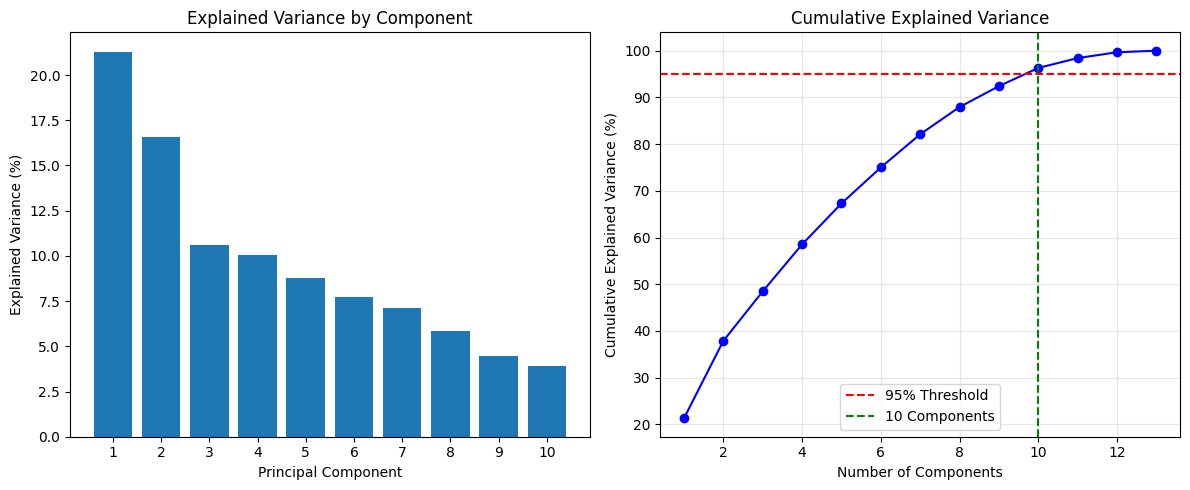

In [10]:
# Calculate Explained Variance
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Analysis:")
print("=" * 60)
for i in range(min(10, len(sorted_eigenvalues))):
    print(f"PC{i+1}: {explained_variance_ratio[i]*100:.2f}% | "
          f"Cumulative: {cumulative_variance_ratio[i]*100:.2f}%")

# Determine number of components to retain (e.g., 95% variance)
variance_threshold = 0.95
num_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

print(f"\n" + "=" * 60)
print(f"Number of components to retain {variance_threshold*100}% variance: {num_components}")
print(f"This retains {cumulative_variance_ratio[num_components-1]*100:.2f}% of the variance")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, min(11, len(sorted_eigenvalues)+1)), 
        explained_variance_ratio[:10]*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(11, len(sorted_eigenvalues)+1)))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio)+1), 
         cumulative_variance_ratio*100, 'bo-')
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=num_components, color='g', linestyle='--', 
            label=f'{num_components} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [11]:
# Step 6: Project Data onto Principal Components
# Use the num_components determined from explained variance analysis
# Or you can manually set it (e.g., 2 for 2D visualization)

num_components_for_projection = num_components

selected_eigenvectors = sorted_eigenvectors[:, :num_components_for_projection]
reduced_data = np.dot(standardized_data, selected_eigenvectors)

print(f"Original data shape: {standardized_data.shape}")
print(f"Reduced data shape: {reduced_data.shape}")
print(f"\nFirst 5 rows of reduced data:")
print(reduced_data[:5])
print(f"\nVariance retained: {cumulative_variance_ratio[num_components_for_projection-1]*100:.2f}%")

Original data shape: (1059, 13)
Reduced data shape: (1059, 10)

First 5 rows of reduced data:
[[ 8.51682045e-01 -1.97096967e+00  4.19222298e+00  2.75397314e+00
   2.69518616e+00  2.01161065e-04 -6.61284999e-01 -7.72773231e-01
   1.18789781e+00 -4.53823009e-01]
 [-2.21019299e+00 -1.63974670e+00  2.14180890e+00 -4.69159225e-01
   1.16975941e+00  8.09873092e-01 -8.47651848e-01 -2.33434843e-01
   7.03869894e-01 -7.51745211e-01]
 [-2.28380005e+00 -1.50729867e+00  2.25654736e+00 -4.97175205e-01
   1.17028456e+00  7.04523288e-01 -6.84375564e-01 -4.21277226e-01
   6.83851676e-01 -6.05479057e-01]
 [-2.27413973e+00 -1.50613199e+00  2.24423896e+00 -4.93984996e-01
   1.15778502e+00  7.01256698e-01 -6.80287238e-01 -4.16571495e-01
   6.77474490e-01 -5.84348747e-01]
 [-2.26448462e+00 -1.50496941e+00  2.23192249e+00 -4.90792888e-01
   1.14528467e+00  6.97959664e-01 -6.76227441e-01 -4.11876486e-01
   6.71098023e-01 -5.63218122e-01]]

Variance retained: 96.31%


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [12]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  
print(f'Original Data Shape: {standardized_data.shape}')
print(f'Dimensionality Reduction: {standardized_data.shape[1]} → {reduced_data.shape[1]} features')
print(f'Variance Retained: {cumulative_variance_ratio[num_components_for_projection-1]*100:.2f}%')
print(f'\nFirst 5 rows of reduced data:')
reduced_df = pd.DataFrame(reduced_data, 
                          columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])
print(reduced_df.head())

Reduced Data Shape: (1059, 10)
Original Data Shape: (1059, 13)
Dimensionality Reduction: 13 → 10 features
Variance Retained: 96.31%

First 5 rows of reduced data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.851682 -1.970970  4.192223  2.753973  2.695186  0.000201 -0.661285   
1 -2.210193 -1.639747  2.141809 -0.469159  1.169759  0.809873 -0.847652   
2 -2.283800 -1.507299  2.256547 -0.497175  1.170285  0.704523 -0.684376   
3 -2.274140 -1.506132  2.244239 -0.493985  1.157785  0.701257 -0.680287   
4 -2.264485 -1.504969  2.231922 -0.490793  1.145285  0.697960 -0.676227   

        PC8       PC9      PC10  
0 -0.772773  1.187898 -0.453823  
1 -0.233435  0.703870 -0.751745  
2 -0.421277  0.683852 -0.605479  
3 -0.416571  0.677474 -0.584349  
4 -0.411876  0.671098 -0.563218  


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

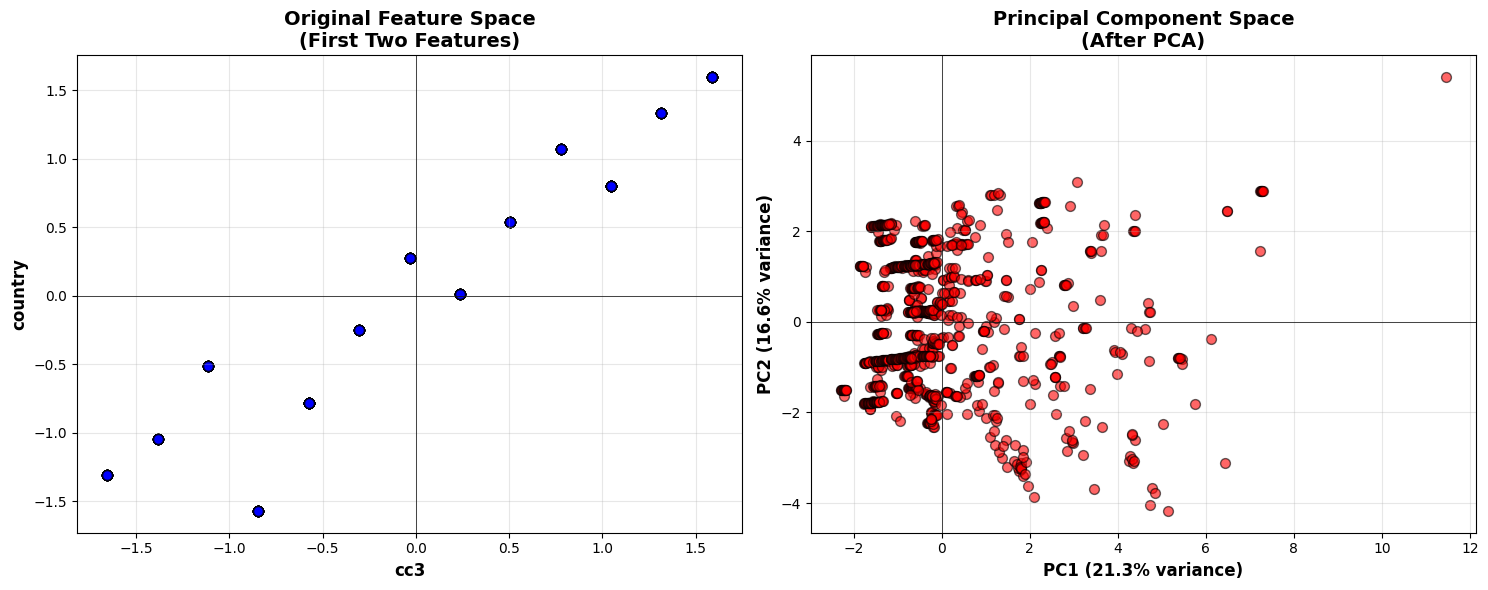


PCA TRANSFORMATION ANALYSIS:

Left plot shows original feature space (cc3 vs country).
Right plot shows principal component space after PCA transformation.

PC1 captures 21.30% of variance (maximum).
PC2 captures 16.58% of variance (second highest).
Together, they retain 37.87% of total variance.

PCA rotates the data to align with directions of maximum variance,
preserving data structure while reducing dimensionality from 13 to 2 features.


In [13]:
# Step 8: Visualize Before and After PCA
# For visualization, we'll project onto 2 components

two_component_eigenvectors = sorted_eigenvectors[:, :2]
data_2d = np.dot(standardized_data, two_component_eigenvectors)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(standardized_data[:, 0], standardized_data[:, 1], 
               alpha=0.6, c='blue', edgecolors='k', s=50)
axes[0].set_xlabel(f'{cols_for_pca[0]}', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'{cols_for_pca[1]}', fontsize=12, fontweight='bold')
axes[0].set_title('Original Feature Space\n(First Two Features)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

axes[1].scatter(data_2d[:, 0], data_2d[:, 1], 
               alpha=0.6, c='red', edgecolors='k', s=50)
axes[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)', 
                  fontsize=12, fontweight='bold')
axes[1].set_title('Principal Component Space\n(After PCA)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# Explanation of PCA transformation
print("\n" + "="*70)
print("PCA TRANSFORMATION ANALYSIS:")
print("="*70)
print(f"\nLeft plot shows original feature space ({cols_for_pca[0]} vs {cols_for_pca[1]}).")
print(f"Right plot shows principal component space after PCA transformation.")
print(f"\nPC1 captures {explained_variance_ratio[0]*100:.2f}% of variance (maximum).")
print(f"PC2 captures {explained_variance_ratio[1]*100:.2f}% of variance (second highest).")
print(f"Together, they retain {(explained_variance_ratio[0]+explained_variance_ratio[1])*100:.2f}% of total variance.")
print(f"\nPCA rotates the data to align with directions of maximum variance,")
print(f"preserving data structure while reducing dimensionality from {standardized_data.shape[1]} to 2 features.")
print("="*70)